# Install Libraries

In [1]:
#!pip install sklearn
#pip install matplotlib
#pip install numpy, seaborn, plotly

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Import Dataset

In [6]:
df = pd.read_csv('Dhaka Rent.csv', sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [11]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [15]:
#df.area
df[['area']].head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [16]:
df.head(4)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100


In [17]:
df.tail(4)

,area,rent
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [20]:
df['area'].head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [22]:
df.shape # row, col

(60, 2)

In [23]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


Text(0, 0.5, 'RENT')

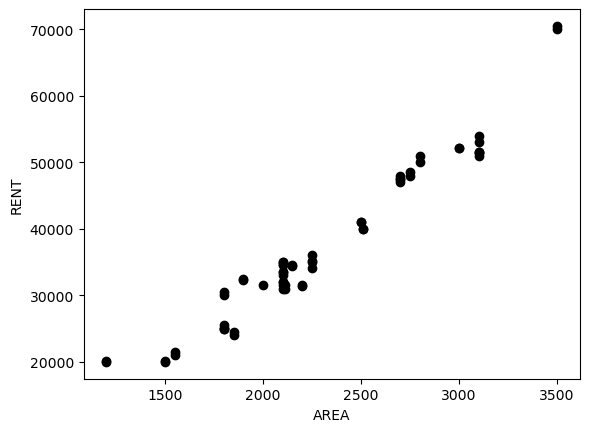

In [28]:
plt.scatter(df.area , df.rent, marker='o', color='black')
plt.xlabel('AREA')
plt.ylabel('RENT')

In [29]:
df.area.mean()

2289.0

In [30]:
df.rent.mean()

37269.166666666664

In [31]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [32]:
x = df.drop('rent', axis=1)
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [33]:
y = df.drop('area', axis=1)
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(x,y)

LinearRegression()

In [37]:
reg.coef_ # m

array([[21.29266147]])

In [38]:
reg.intercept_ # c

array([-11469.73544643])

In [39]:
reg.predict([[2000]])

array([[31115.58750079]])

In [41]:
df['residuals'] = df[['rent']] - reg.predict(x)
df.head()

,area,rent,residuals
0,2000,31500,384.412499
1,2100,35000,1755.146352
2,2500,41050,-711.918238
3,2250,36100,-338.752869
4,3000,52100,-308.248974


In [42]:
df['predict'] = reg.predict(x) 
df.head()

,area,rent,residuals,predict
0,2000,31500,384.412499,31115.587501
1,2100,35000,1755.146352,33244.853648
2,2500,41050,-711.918238,41761.918238
3,2250,36100,-338.752869,36438.752869
4,3000,52100,-308.248974,52408.248974


Text(0, 0.5, 'RENT')

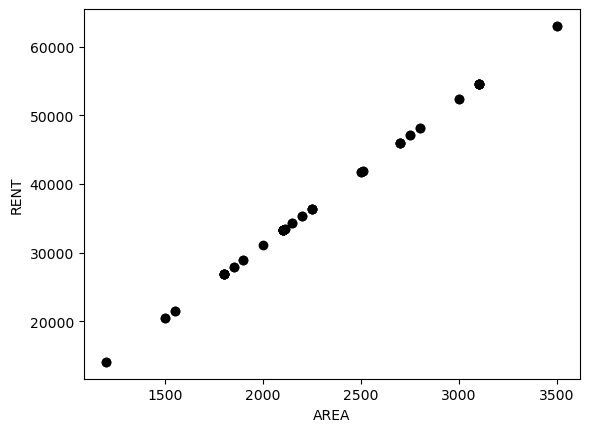

In [43]:
plt.scatter(df.area , df.predict, marker='o', color='black')
plt.xlabel('AREA')
plt.ylabel('RENT')

Text(0, 0.5, 'RENT')

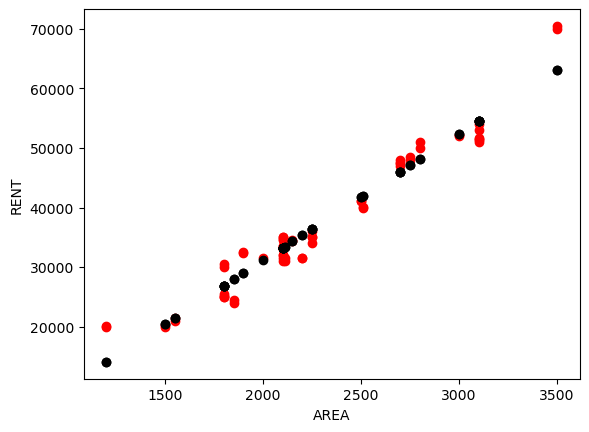

In [45]:
plt.scatter(df.area , df.rent, marker='o', color='red')
plt.scatter(df.area , df.predict, marker='o', color='black')
plt.xlabel('AREA')
plt.ylabel('RENT')

Text(0, 0.5, 'RENT')

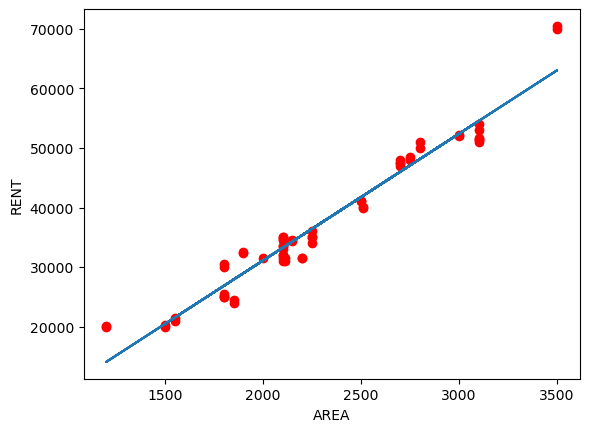

In [46]:
plt.scatter(df.area , df.rent, marker='o', color='red')
plt.plot(df.area, df.predict)
plt.xlabel('AREA')
plt.ylabel('RENT')

# MSE

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
mse = mean_squared_error(df['rent'] , df['predict'])
mse

6778077.2040955555

In [51]:
mean_absolute_error(df['rent'] , df['predict'])

2009.869509357628

In [53]:
import math 
math.sqrt(mse) #RMSE

2603.4740644176877